# Non-connected graphs
-------------
Observe the appearences of graphs made of more than one connected component when sampling from the ensemble

In [1]:
include("../code/headers.jl")

For different sizes and rates, draw `ngraphs` instances from the ensemble. For each one, compute the number of connected components

In [39]:
q = 2
nn = Int.(round.(10 .^ (2:0.5:4)))
R = collect(0.21:0.1:0.81) 
mm = [Int.(round.(n*(1 .- R))) for n in nn]
ngraphs = 100
randseed = 12

ndisconnected = [zeros(Int, length(R)) for n in nn];

In [40]:
for (i,n) in enumerate(nn)
    println("- Size $i of $(length(nn))")
    for (j,m) in enumerate(mm[i])
        println("-- Rate $j of $(length(mm[i]))")
        for k in 1:ngraphs
            fg = ldpc_graph(q, n, m, randseed=randseed+k)
            g = SimpleGraph(full_adjmat(fg))
            ncc = length(connected_components(g))
            ncc > 1 && (ndisconnected[i][j] += 1)
        end
    end
end

- Size 1 of 5
-- Rate 1 of 7
-- Rate 2 of 7
-- Rate 3 of 7
-- Rate 4 of 7
-- Rate 5 of 7
-- Rate 6 of 7
-- Rate 7 of 7
- Size 2 of 5
-- Rate 1 of 7
-- Rate 2 of 7
-- Rate 3 of 7
-- Rate 4 of 7
-- Rate 5 of 7
-- Rate 6 of 7
-- Rate 7 of 7
- Size 3 of 5
-- Rate 1 of 7
-- Rate 2 of 7
-- Rate 3 of 7
-- Rate 4 of 7
-- Rate 5 of 7
-- Rate 6 of 7
-- Rate 7 of 7
- Size 4 of 5
-- Rate 1 of 7
-- Rate 2 of 7
-- Rate 3 of 7
-- Rate 4 of 7
-- Rate 5 of 7
-- Rate 6 of 7
-- Rate 7 of 7
- Size 5 of 5
-- Rate 1 of 7
-- Rate 2 of 7
-- Rate 3 of 7
-- Rate 4 of 7
-- Rate 5 of 7
-- Rate 6 of 7
-- Rate 7 of 7


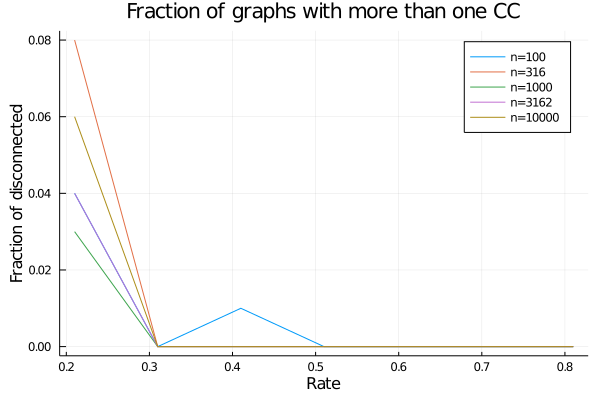

In [41]:
pl = Plots.Plot()
for (i,n) in enumerate(nn)
    plot!(pl, R, ndisconnected[i]/ngraphs, label="n=$n", maker=:circle)
end
title!(pl, "Fraction of graphs with more than one CC")
xlabel!(pl, "Rate"); ylabel!(pl, "Fraction of disconnected")
pl